# Introduction

**Limitations of singly linked lists**

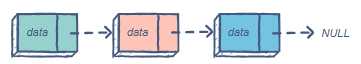

* The **singly linked list (SLL)** is a linear data structure comprising nodes chained together in a single direction. 
* Each node contains a data member holding useful information, and a pointer to the next node.
* The problem with this structure is that it only allows us to **traverse forward**, i.e., we cannot iterate back to a previous node if required.
* This is where the doubly linked list (DLL) shines. DLLs are an extension of basic linked lists with only one difference:
    * > ***A doubly linked list contains a pointer to the next node as well as the previous node.***
    * > ***This ensures that the list can be traversed in both directions.***

**Doubly Linked List**

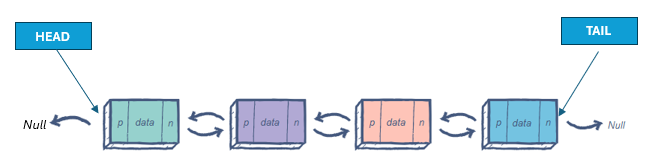

A **doubly linked list** is a type of linked list where each node contains:
* the `data`.
* a pointer to the next node called `next`.
* a pointer to the previous node called `prev`.

**Head** and **Tail**: 
* The first node in the list is called the `head`, and its `prev` pointer is set to `null`.
* The last node is the `tail`, and its `next` pointer is set to `null`. 

**Key features and advantages**
* **Bidirectional Traversal**: You can move forward and backward through the list. 
* **Efficient Deletion**: Deleting a node is easier and more efficient than in a singly linked list because you have direct access to the previous node. 
* **Flexibility**: The ability to traverse in both directions provides greater flexibility for data management and manipulation, such as navigating through a music playlist. 

**Disadvantages**
* **Increased Memory Usage**: Each node requires extra memory for the `prev` pointer compared to a singly linked list. 

# Double Linked List implementation

In [29]:
class Node:
    def __init__(self, data):
        self.data = data
        self.prev = None
        self.next = None

    def __str__(self):
        return str(self.data)


class DoublyLinkedList:

    # Creation of a Doubly Linked List with zero nodes
    def __init__(self):
        # Empty Doubly Linked List
        self.head = None
        self.tail = None
        self.length = 0

    # Print string representation of a Doubly Linked List
    def __str__(self):
        temp_node = self.head
        result = ''
        # Doubly Linked List traversal
        while temp_node is not None:
            result += str(temp_node.data)
            if temp_node.next is not None:
                result += ' <-> '
            temp_node = temp_node.next
        return result

    # Insertion at the end of the Doubly Linked List
    def append(self, value):
        new_node = Node(value)
        # add node in an empty Doubly Linked list
        if not self.head:  # self.head == None (equal to self.length==0)
            self.head = new_node
            self.tail = new_node
            self.length += 1
        # insert at the end of the doubly linked list
        else:
            new_node.prev = self.tail
            self.tail.next = new_node
            self.tail = new_node
            self.length += 1

    # Insertion at the beginning of the Doubly linked list
    def prepend(self, value):
        new_node = Node(value)
        # add node in an empty Doubly linked list
        if not self.head:  # self.head == None (equal to self.length==0)
            self.head = new_node
            self.tail = new_node
            self.length += 1
        # insert at the beginning of the Doubly linked list
        else:
            new_node.next = self.head
            self.head.prev = new_node
            self.head = new_node
            self.length += 1

    # Insertion in the middle of the Doubly linked list
    def insert(self, index, value):
        if index < 0 or index > self.length:  # Check for out of range
            print("Index out of range")
            return False

        new_node = Node(value)

        # add node in an empty Doubly linked list
        if self.length == 0:  # if list is empty
            self.head = new_node
            self.tail = new_node
            self.length += 1
        # insert at the beginning
        elif index == 0:
            new_node.next = self.head
            self.head.prev = new_node
            self.head = new_node
            self.length += 1
        # insert at the end
        elif index == self.length:
            new_node.prev = self.tail
            self.tail.next = new_node
            self.tail = new_node
            self.length += 1
        # insert in the middle
        else:
            temp_node = self.head
            # Traverse to the previous node of the index node
            for _ in range(index - 1):
                temp_node = temp_node.next
            new_node.next = temp_node.next
            new_node.prev = temp_node
            temp_node.next.prev = new_node
            temp_node.next = new_node
            self.length += 1

        return True

    # Doubly Linked List traversal
    def traverse(self):
        if not self.head:  # If the list is empty
            print("Doubly Linked List is Empty!!")
            return -1
        current_node = self.head
        while current_node is not None:
            print(current_node.data)
            current_node = current_node.next
        return 0

    # Doubly Linked List reverse traversal
    def reverse_traverse(self):
        if not self.tail:  # If the list is empty
            print("Doubly Linked List is Empty!!")
            return -1
        current_node = self.tail
        while current_node is not None:
            print(current_node.data)
            current_node = current_node.prev
        return 0

    # Search node in a doubly linked list
    def search(self, target):
        if not self.head:  # If the list is empty
            print("Doubly Linked List is Empty!!")
            return -1
        index = 0
        current_node = self.head
        while current_node: # while current_node is not None:
            if current_node.data == target:
                return index
            current_node = current_node.next
            index += 1
        return -1

    # Get node of a Doubly linked list
    def get(self, index):
        if index == -1:
            return self.tail
        elif index < -1 or index >= self.length:
            print("Invalid Index!!!")
            return -1
        elif index < self.length//2:
            current_node = self.head
            for _ in range(index):
                current_node = current_node.next
        else:
            current_node = self.tail
            for _ in range(self.length - 1, index, -1):
                current_node = current_node.prev

        return current_node

    # Set value of a node of doubly linked list
    def set_value(self, index, data):
        temp = self.get(index)
        if temp:
            temp.data = data
            return 0
        return -1


    # Pop first node of a doubly linked list
    def pop_first(self):
        # pop_first in an empty Doubly Linked List
        if self.length == 0:
            return None
        popped_node = self.head
        # pop_first in a Doubly Linked List having only one node
        if self.length == 1:
            self.head = None
            self.tail = None
            self.length -= 1
        # pop_first in a Doubly Linked List having more than one node
        else:
            self.head = self.head.next
            self.head.prev = None
            popped_node.next = None
            self.length -= 1
        return popped_node

    
    # Pop last node of a Doubly linked list
    def pop(self):
        # pop in an empty Doubly Linked List
        if self.length == 0:
            return None
        popped_node = self.tail
        # pop in a Doubly Linked List having only one node
        if self.length == 1:
            self.head = None
            self.tail = None
            self.length -= 1
        # pop in a Doubly Linked List having more than one node
        else:
            self.tail = self.tail.prev  # Updating the tail to be the second last node
            self.tail.next = None
            popped_node.prev = None
            self.length -= 1
        return popped_node

    # Remove any middle-indexed node of a doubly linked list
    def remove(self, index):
        if index < -1 or index >= self.length:
            print("Invalid Index!!!")
            return None
        # remove specified indexed node in an empty doubly Linked List
        if index == 0:
            return self.pop_first()
        # remove specified indexed node in a doubly Linked List having only one node
        if index == -1 or index == self.length - 1:
            return self.pop()
        # remove specified indexed node in a doubly Linked List having more than one node
        popped_node = self.get(index)  # reference of the specified indexed node
        popped_node.prev.next = popped_node.next
        popped_node.next.prev = popped_node.prev
        popped_node.next = None
        popped_node.prev = None
        self.length -= 1
        return popped_node


    # Delete all nodes of a Doubly linked list
    def delete_all(self):
        if self.length == 0:
            return  # If the list is empty, just return
        for _ in range(self.length):
            self.pop()  



# Creation of Doubly Linked List

**Creation of an Empty Doubly Linked List with zero nodes**

```python
class DoublyLinkedList:

    # Creation of a Doubly Linked List with zero nodes
    def __init__(self):
        # Empty Doubly Linked List
        self.head = None
        self.tail = None
        self.length = 0
```

**Creation of a Circular Singly Linked List with a single node**

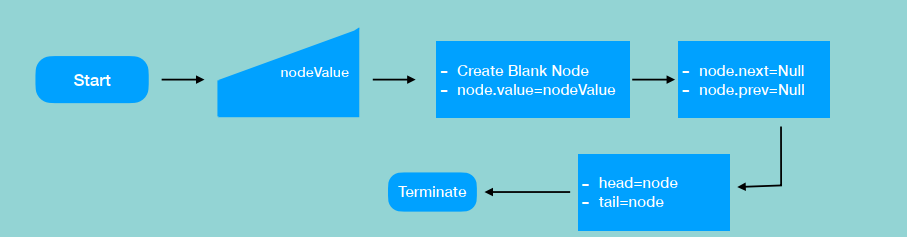

```python
class DoublyLinkedList:

    # Creation of a Doubly Linked List with zero nodes
    def __init__(self):
        # Empty Doubly Linked List
        self.head = None
        self.tail = None
        self.length = 0
```

# Insertion in Doubly Linked List

1. Insert a new node at the end of the doubly linked list - `append()` operation
2. Insert a new node at the beginning of the doubly linked list - `prepend()` operation
3. Insert at a specified index of a doubly linked list - `insert()` operation

## Insert a new node at the end of the doubly linked list - `append()` operation

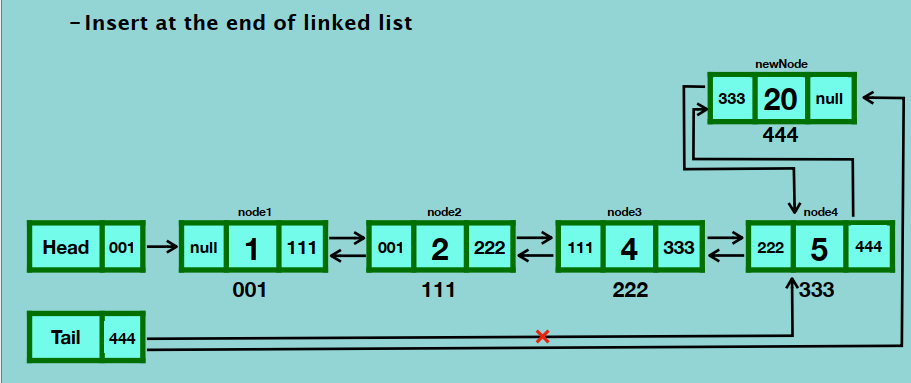

**Case 1: append in an empty Doubly Linked List**
* Create a **new_node**.
* Set `head` to point to the **new_node**.
* Set `tail` to point to the **new_node**.
* Increase the doubly linked list length by 1.

```
new_node = Node(3)
head = new_node
tail = new_node
doubly_linked_list_length = doubly_linked_list_length + 1
```

**Case 2: append in a Doubly Linked List having one or more nodes**
* Create a **new_node**.
* Set `prev` pointer of the **new_node** to point to the **last_node** pointed by `tail`.
* Set `next` pointer of the **last_node** pointed by `tail` to point to the **new_node**.
* Set `tail` to point to the **new_node**.
* Increase the doubly linked list length by 1.

```
new_node = Node(3)
new_node.prev = tail
tail.next = new_node
tail = new_node
doubly_linked_list_length = doubly_linked_list_length + 1
```

**Implementation**

```python
# Insertion at the end of the Doubly Linked List
def append(self, value):
    new_node = Node(value)
    # add node in an empty Doubly Linked list
    if not self.head: # self.head == None
        self.head = new_node
        self.tail = new_node
        self.length += 1
    # insert at the end of the doubly linked list
    else:
        new_node.prev = selftail
        self.tail.next = new_node
        self.tail = new_node
        self.length += 1
```

In [10]:
# Create Doubly Linked List: 10 > 20 > 30 > 40 
doubly_linked_list = DoublyLinkedList()
doubly_linked_list.append(10)
doubly_linked_list.append(20)
doubly_linked_list.append(30)
doubly_linked_list.append(40)

print("Doubly Linked List: ", doubly_linked_list)

# Insert a new node at the end of the linked list with a node having a value of 50
doubly_linked_list.append(50)

print("Last node value: ", doubly_linked_list.tail.data)
print("Length of the linked list: ", doubly_linked_list.length)
print("Linked List after append: ", doubly_linked_list)

Doubly Linked List:  10 <-> 20 <-> 30 <-> 40
Last node value:  50
Length of the linked list:  5
Linked List after append:  10 <-> 20 <-> 30 <-> 40 <-> 50


## Insert a new node at the beginning of the doubly linked list - `prepend()` operation

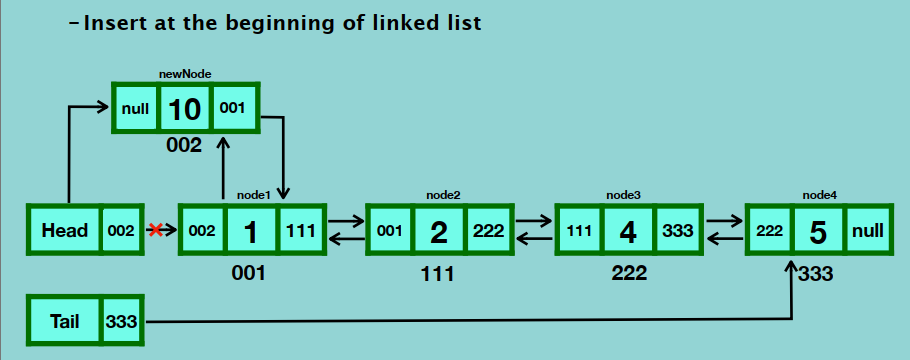

**Case 1: prepend in an empty Doubly Linked List**
* Create a **new_node**.
* Set `head` to point to the **new_node**.
* Set `tail` to point to the **new_node**.
* Increase the circular singly linked list length by 1.

```
new_node = Node(3)
head = new_node
tail = new_node
doubly_linked_list_length = doubly_linked_list_length + 1
```

**Case 2: prepend in a Doubly Linked List having one or more nodes**
* Create a **new_node**.
* Set the `next` pointer of the **new_node** to the **first node** (pointed by `head`) of the linked list.
* Set the `prev` pointer of the **first node** (pointed by `head`) to point to the **new_node**.
* Set `head` pointer to point to the **new_node**.
* Increase the circular singly linked list length by 1.

```
new_node = Node(0)
new_node.next = head
head.prev = new_node
head = new_node
doubly_linked_list_length = doubly_linked_list_length + 1
```

**Implementation**

```python
    # Insertion at the beginning of the Doubly linked list
    def prepend(self, value):
        new_node = Node(value)
        # add node in an empty Doubly linked list
        if not self.head:  # self.head == None (equal to self.length==0)
            self.head = new_node
            self.tail = new_node
            self.length += 1
        # insert at the beginning of the Doubly linked list
        else:
            new_node.next = self.head
            self.head.prev = new_node
            self.head = new_node
            self.length += 1
```

In [2]:
# Create Doubly Linked List: 10 > 20 > 30 > 40 
doubly_linked_list = DoublyLinkedList()
doubly_linked_list.prepend(50)
doubly_linked_list.prepend(40)
doubly_linked_list.prepend(30)
doubly_linked_list.prepend(20)

print("Doubly Linked List: ", doubly_linked_list)

# Insert a new node at the beginning of the linked list with a node having a value of 50
doubly_linked_list.prepend(10)

print("First node value: ", doubly_linked_list.head.data)
print("Length of the linked list: ", doubly_linked_list.length)
print("Linked List after prepend: ", doubly_linked_list)

Doubly Linked List:  20 <-> 30 <-> 40 <-> 50
First node value:  10
Length of the linked list:  5
Linked List after prepend:  10 <-> 20 <-> 30 <-> 40 <-> 50


## Insert at a specified index of a doubly linked list - `insert()` operation

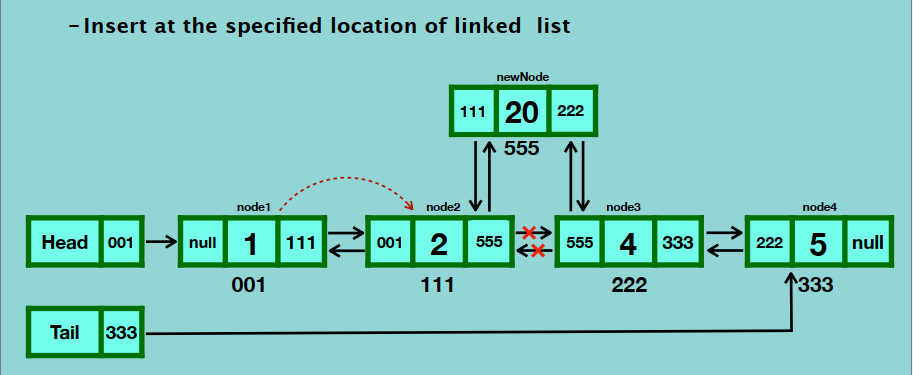

**Case 1: Insert in an empty Doubly Linked List**
* Create a **new_node**.
* Set `head` to point to the **new_node**.
* Set `tail` to point to the **new_node**.
* Increase the doubly linked list length by 1.

```
new_node = Node(3)
head = new_node
tail = new_node
doubly_linked_list_length = doubly_linked_list_length + 1
```

**Case 2: Insert at the beginning of a Doubly Linked List having one or more nodes**
* Create a **new_node**.
* Set the `next` pointer of the **new_node** to the **first node** (pointed by `head`) of the linked list.
* Set the `prev` pointer of the **first node** (pointed by `head`) to point to the **new_node**.
* Set `head` pointer to point to the **new_node**.
* Increase the circular singly linked list length by 1.

```
new_node = Node(0)
new_node.next = head
head.prev = new_node
head = new_node
doubly_linked_list_length = doubly_linked_list_length + 1
```


**Case 3: Insert at the end of a Doubly Linked List having one or more nodes**
* Create a **new_node**.
* Set `prev` pointer of the **new_node** to point to the **last_node** pointed by `tail`.
* Set `next` pointer of the **last_node** pointed by `tail` to point to the **new_node**.
* Set `tail` to point to the **new_node**.
* Increase the doubly linked list length by 1.

```
new_node = Node(3)
new_node.prev = tail
tail.next = new_node
tail = new_node
doubly_linked_list_length = doubly_linked_list_length + 1
```

**Case 4: Insert at a specific index of a Doubly Linked List having one or more nodes**
* Create a **new_node**.
* Traverse to the **previous node** pointing to the **index_node** where the **new_node** will be inserted.
* Set **temp_node** pointer to point the**previous node** of the **index_node**.
* Set the `next` pointer of the **new_node** to point to the node pointed by the `temp_node.next`.
* Set the `prev` pointer of the **index_node** (i.e., `temp_node.next.prev`) to point to the **new_node**.
* Now, set the `next` pointer of the **temp_node** to point to the **new_node**.
* Also, set the `prev` pointer of the **new_node** to point to the **temp_node**.
* Increase the doubly linked list length by 1.

```
new_node = Node(3)
temp_node = head

for _ in range(index-1):
    temp_node = temp_node.next

new_node.next = temp_node.next
new_node.prev = temp_node
temp_node.next.prev = new_node
temp_node.next = new_node

doubly_linked_list_length = doubly_linked_list_length + 1
```



**Implementation**

```python
# Insertion in the middle of the doubly linked list
    def insert(self, index, value):
        if index < 0 or index > self.length:  # Check for out of range
            print("Index out of range")
            return False

        new_node = Node(value)

        # add node in an empty Doubly linked list
        if self.length == 0:  # if list is empty
            self.head = new_node
            self.tail = new_node
            self.length += 1
        # insert at the beginning
        elif index == 0:
            new_node.next = self.head
            self.head.prev = new_node
            self.head = new_node
            self.length += 1
        # insert at the end
        elif index == self.length:
            new_node.prev = self.tail
            self.tail.next = new_node
            self.tail = new_node
            self.length += 1
        # insert in the middle
        else:
            temp_node = self.head
            # Traverse to the previous node of the index node
            for _ in range(index - 1):
                temp_node = temp_node.next
            new_node.next = temp_node.next
            new_node.prev = temp_node
            temp_node.next.prev = new_node
            temp_node.next = new_node
            self.length += 1

        return True
```

In [4]:
# Create Doubly Linked List: 10 > 20 > 30 > 40 
doubly_linked_list = DoublyLinkedList()
doubly_linked_list.append(10)
doubly_linked_list.append(20)
doubly_linked_list.append(30)
doubly_linked_list.append(40)

print("Doubly Linked List before insertions: ", doubly_linked_list)

# Insert a new node at a specified index in a Circular linked list
print("Insert at the beginning of the Doubly Linked List: ", str(doubly_linked_list.insert(0, 50)))
print("Insert in the middle of the Doubly Linked List: ", str(doubly_linked_list.insert(2, 60)))
print("Insert at the end of the Doubly Linked List: ", str(doubly_linked_list.insert(doubly_linked_list.length, 70)))

print("Length of the Circular Linked List: ", doubly_linked_list.length)
print("Doubly Linked List after insertions: ", doubly_linked_list)

print() 

empty_doubly_linked_list = DoublyLinkedList()
print("Insert at Invalid Index of a Doubly Linked List: ", str(empty_doubly_linked_list.insert(1, 100)))
print("Insert in an empty Doubly Linked List: ", str(empty_doubly_linked_list.insert(0, 100)))
print("Doubly Linked List after insertions: ", empty_doubly_linked_list)

Doubly Linked List before insertions:  10 <-> 20 <-> 30 <-> 40
Insert at the beginning of the Doubly Linked List:  True
Insert in the middle of the Doubly Linked List:  True
Insert at the end of the Doubly Linked List:  True
Length of the Circular Linked List:  7
Doubly Linked List after insertions:  50 <-> 10 <-> 60 <-> 20 <-> 30 <-> 40 <-> 70

Index out of range
Insert at Invalid Index of a Doubly Linked List:  False
Insert in an empty Doubly Linked List:  True
Doubly Linked List after insertions:  100


# Doubly linked list Insertion Algorithm

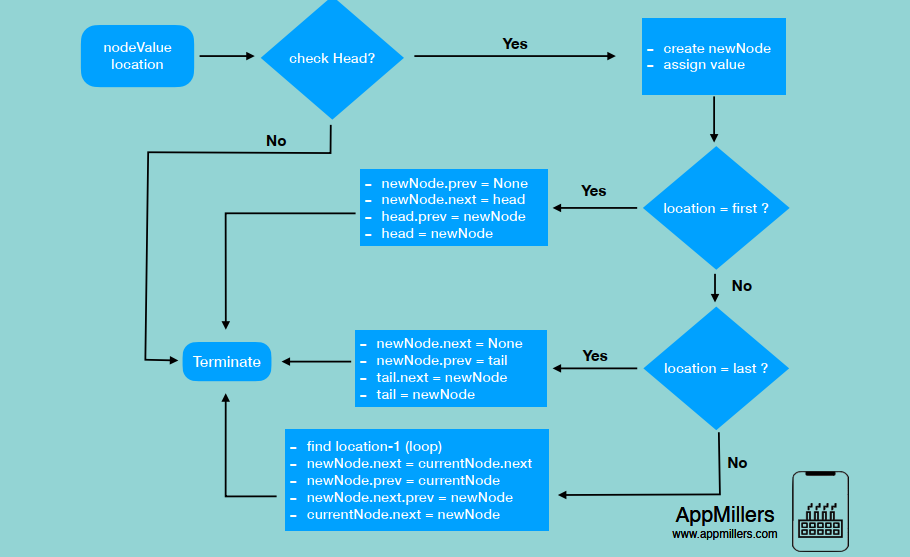

# Traversal of doubly linked list

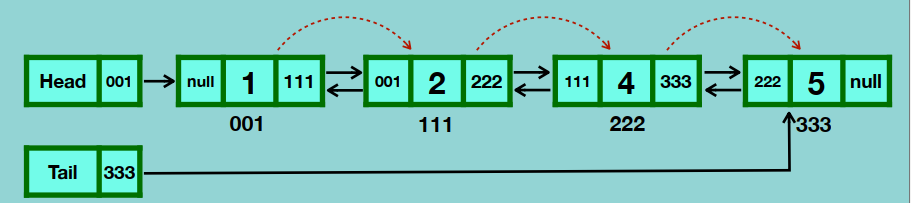

**Implementation**

```python
# Doubly Linked List traversal
def traverse(self):
    if not self.head:  # If the list is empty
        print("Doubly Linked List is Empty!!")
        return -1
    current_node = self.head
    while current_node is not None:
        print(current_node.data)
        current_node = current_node.next
    return 0
```

In [12]:
# Create Doubly Linked List: 10 > 20 > 30 > 40 
doubly_linked_list = DoublyLinkedList()

print("Empty Doubly Linked List: ", doubly_linked_list)
print("Traversing Doubly Linked List Status: ", doubly_linked_list.traverse())
print()

doubly_linked_list.append(10)
doubly_linked_list.append(20)
doubly_linked_list.append(30)
doubly_linked_list.append(40)

print("Doubly Linked List after adding nodes: ", doubly_linked_list)
print("Traversing Doubly Linked List Status: ", doubly_linked_list.traverse())

Empty Doubly Linked List:  
Doubly Linked List is Empty!!
Traversing Doubly Linked List Status:  -1

Doubly Linked List after adding nodes:  10 <-> 20 <-> 30 <-> 40
10
20
30
40
Traversing Doubly Linked List Status:  0


# Reverse Traversal in doubly linked list

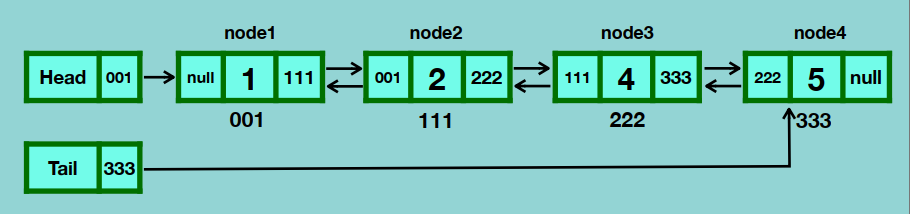

**Implementation**

```python
# Doubly Linked List reverse traversal
def reverse_traverse(self):
    if not self.tail:  # If the list is empty
        print("Doubly Linked List is Empty!!")
        return -1
    current_node = self.tail
    while current_node is not None:
        print(current_node.data)
        current_node = current_node.prev
    return 0
```

In [11]:
# Create Doubly Linked List: 10 > 20 > 30 > 40 
doubly_linked_list = DoublyLinkedList()

print("Empty Doubly Linked List: ", doubly_linked_list)
print("Traversing Doubly Linked List Status: ", doubly_linked_list.reverse_traverse())
print()

doubly_linked_list.append(10)
doubly_linked_list.append(20)
doubly_linked_list.append(30)
doubly_linked_list.append(40)

print("Doubly Linked List after adding nodes: ", doubly_linked_list)
print("Traversing Doubly Linked List Status: ", doubly_linked_list.reverse_traverse())

Empty Doubly Linked List:  
Doubly Linked List is Empty!!
Traversing Doubly Linked List Status:  -1

Doubly Linked List after adding nodes:  10 <-> 20 <-> 30 <-> 40
40
30
20
10
Traversing Doubly Linked List Status:  0


# Searching in Doubly Linked List

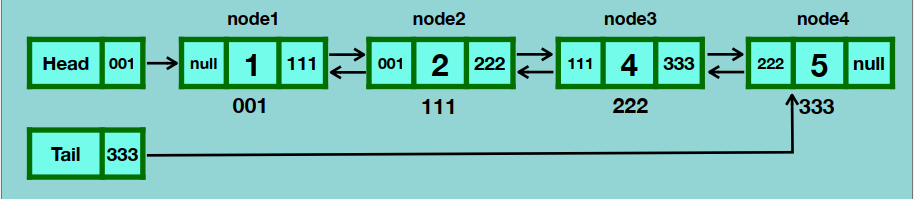

**Implementation**:

```python
 # Search node in a doubly linked list
    def search(self, target):
        if not self.head:  # If the list is empty
            print("Doubly Linked List is Empty!!")
            return -1
        index = 0
        current_node = self.head
        while current_node: # while current_node is not None:
            if current_node.data == target:
                return index
            current_node = current_node.next
            index += 1
        return -1
```

In [14]:
# Create Doubly Linked List: 10 > 20 > 30 > 40 
doubly_linked_list = DoublyLinkedList()

print("Empty Doubly Linked List: ", doubly_linked_list)
print("Element found at index: ", doubly_linked_list.search(30))
print()

doubly_linked_list.append(10)
doubly_linked_list.append(20)
doubly_linked_list.append(30)
doubly_linked_list.append(40)

print("Doubly Linked List after adding nodes: ", doubly_linked_list)

print("Element found at index: ", doubly_linked_list.search(30))
print("Element found at index: ", doubly_linked_list.search(50))

Empty Doubly Linked List:  
Doubly Linked List is Empty!!
Element found at index:  -1

Doubly Linked List after adding nodes:  10 <-> 20 <-> 30 <-> 40
Element found at index:  2
Element found at index:  -1


# `get()` method - to get the node of a doubly linked list

**Implementation**

```python
# Get node of a Doubly linked list
    def get(self, index):
        if index == -1:
            return self.tail
        elif index < -1 or index >= self.length:
            print("Invalid Index!!!")
            return -1
        elif index < self.length//2:
            current_node = self.head
            for _ in range(index):
                current_node = current_node.next
        else:
            current_node = self.tail
            for _ in range(self.length - 1, index, -1):
                current_node = current_node.prev

        return current_node
```

In [17]:
# Create Doubly Linked List: 10 > 20 > 30 > 40 
doubly_linked_list = DoublyLinkedList()
doubly_linked_list.append(10)
doubly_linked_list.append(20)
doubly_linked_list.append(30)
doubly_linked_list.append(40)

print("Doubly Singly Linked List: ", doubly_linked_list)
print("Last Node value: ", doubly_linked_list.get(-1).data)
print("Index 2 Node: ", doubly_linked_list.get(2).data)

Doubly Singly Linked List:  10 <-> 20 <-> 30 <-> 40
Last Node value:  40
Index 2 Node:  30


# `set_value()` method - to update a node value of doubly linked list

**Implementation**

```python
# Set value of a node of doubly linked list
def set_value(self, index, data):
    temp = self.get(index)
    if temp:
        temp.data = data
        return 0
    return -1
```

In [21]:
# Create Doubly Linked List: 10 > 20 > 30 > 40 
doubly_linked_list = DoublyLinkedList()
doubly_linked_list.append(10)
doubly_linked_list.append(20)
doubly_linked_list.append(30)
doubly_linked_list.append(40)

print("Doubly Linked List: ", doubly_linked_list)

# set index 2 node value to 50
doubly_linked_list.set_value(2, 50)

print("Doubly Linked List: ", doubly_linked_list)
print()

Doubly Linked List:  10 <-> 20 <-> 30 <-> 40
Doubly Linked List:  10 <-> 20 <-> 50 <-> 40



# Deletion in Doubly Linked List

* Deleting the first node: `pop_first()` method
* Deleting the last node: `pop()` method
* Deleting any given node: `remove()` method
* Delete all nodes: `delete_all()` method

## Deleting the first node: `pop_first()` method

The `pop_first()` method removes & returns the first node of a doubly linked list.

**Case 1: `pop_first()` in an empty Doubly Linked List**

No node to pop, hence return `None`.

**Case 2: `pop_first()` in a Doubly Linked List having only one node**

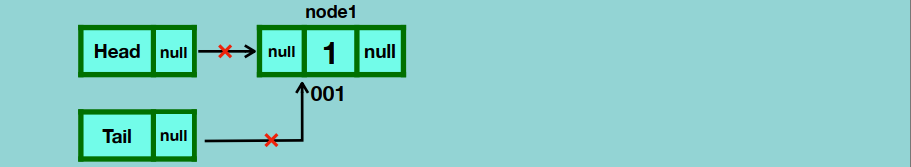

* Store the reference of **first node** (i.e., `head`) in `popped_node`.
* Set `head` to `None`.
* Set `tail` to `None`.
* Decrease the doubly linked list length by 1.
* Return `popped_node`.

```
popped_node = head
head = None
tail = None
doubly_linked_list_length = doubly_linked_list_length - 1
return popped_node
```

**Case 3: `pop_first()` in a Doubly Linked List having more than one node**

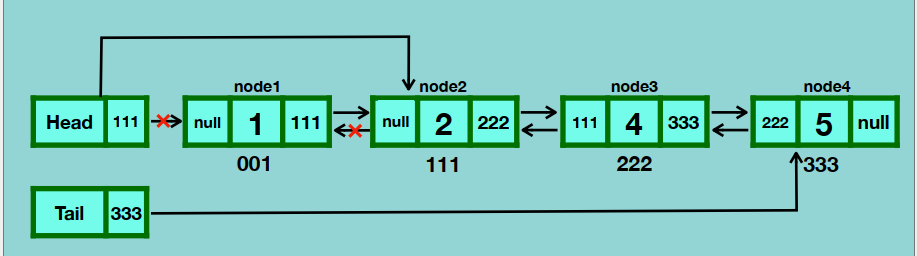

* Store the reference of **first node** (i.e., `head`) in `popped_node`.
* Set `head` to point to **second node** (i.e., `head.next`).
* Set the `prev` pointer of the **second node**, which is now `head` to `None`.
* Set the `next` pointer of the **first node** (i.e., `popped_node`) to `None`.
* Decrease the doubly linked list length by 1.
* Return the **first node** (i.e., `popped_node`).

```
popped_node = head
head = head.next
head.prev = None
popped_node.next = None
doubly_linked_list_length = doubly_linked_list_length - 1
return popped_node
```

**Implementation**

```python
# Pop first node of a doubly linked list
    def pop_first(self):
        # pop_first in an empty Doubly Linked List
        if self.length == 0:
            return None
        popped_node = self.head
        # pop_first in a Doubly Linked List having only one node
        if self.length == 1:
            self.head = None
            self.tail = None
            self.length -= 1
        # pop_first in a Doubly Linked List having more than one node
        else:
            self.head = self.head.next
            self.head.prev = None
            popped_node.next = None
            self.length -= 1
        return popped_node
```


In [23]:
# Create Doubly Linked List: 10 > 20 > 30 > 40 
doubly_linked_list = DoublyLinkedList()

print(doubly_linked_list.pop_first())

# Create Linked List: 10 > 20 > 30 > 40 
doubly_linked_list.append(10)
doubly_linked_list.append(20)
doubly_linked_list.append(30)
doubly_linked_list.append(40)

print("Doubly Linked List: ", doubly_linked_list)

print("Node popped out has data = ", doubly_linked_list.pop_first().data)
print("Doubly Linked List: ", doubly_linked_list)

None
Doubly Linked List:  10 <-> 20 <-> 30 <-> 40
Node popped out has data =  10
Doubly Linked List:  20 <-> 30 <-> 40


## Deleting the last node: `pop()` method

The `pop()` method removes & returns the last node of a doubly linked list.

**Case 1: `pop()` in an empty Doubly Linked List**

No node to pop, hence return `None`.

**Case 2: `pop()` in a Doubly Linked List having only one node**

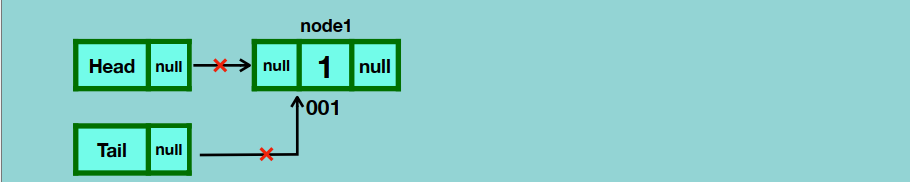

* Store the reference of **last node** (i.e., `tail`) in `popped_node`.
* Set `head` to `None`.
* Set `tail` to `None`.
* Decrease the doubly linked list length by 1.
* Return `popped_node`.

```
popped_node = tail
head = None
tail = None
doubly_linked_list_length = doubly_linked_list_length - 1
return popped_node
```

**Case 3: `pop()` in a Doubly Linked List having more than one node**

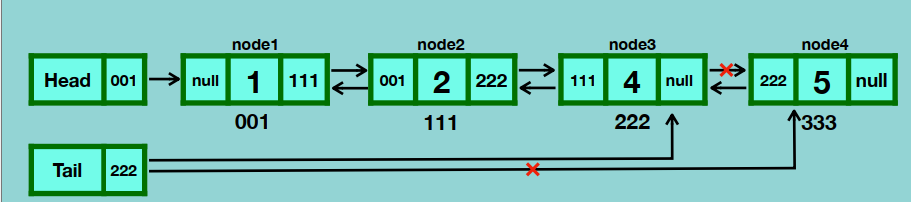

* Store the reference of **last node** (i.e., `tail`) in `popped_node`.
* Set `tail` to point to the **second last node** (i.e., `tail.prev`).
* Set `tail.next` to `None`
* Set the `popped_node.prev` pointer to point to `None`.
* Decrease the doubly linked list length by 1.
* Return popped_node

```
popped_node = tail
tail = tail.prev
tail.next = None
popped_node.prev = None
doubly_linked_list_length = doubly_linked_list_length - 1
return popped_node
```

**Implementation**

```python
    # Pop last node of a Doubly linked list
    def pop(self):
        # pop in an empty Doubly Linked List
        if self.length == 0:
            return None
        popped_node = self.tail
        # pop in a Doubly Linked List having only one node
        if self.length == 1:
            self.head = None
            self.tail = None
            self.length -= 1
        # pop in a Doubly Linked List having more than one node
        else:
            self.tail = self.tail.prev  # Updating the tail to be the second last node
            self.tail.next = None
            popped_node.prev = None
            self.length -= 1
        return popped_node
```

In [25]:
# Create Doubly Linked List: 10 > 20 > 30 > 40 
doubly_linked_list = DoublyLinkedList()

print(doubly_linked_list.pop())

# Create Linked List: 10 > 20 > 30 > 40 
doubly_linked_list.append(10)
doubly_linked_list.append(20)
doubly_linked_list.append(30)
doubly_linked_list.append(40)

print("Doubly Linked List: ", doubly_linked_list)

print("Node popped out has data = ", doubly_linked_list.pop().data)
print("Doubly Linked List: ", doubly_linked_list)

None
Doubly Linked List:  10 <-> 20 <-> 30 <-> 40
Node popped out has data =  40
Doubly Linked List:  10 <-> 20 <-> 30


## Deleting any given node: `remove()` method

The `remove()` method removes & returns the specified indexed node of a doubly linked list.

**Case 1: `remove()` specified indexed node in an empty doubly linked list**

**USECASE >>** Deleting the first node: `pop_first()` method.

**Case 2: `remove()` specified indexed node in a doubly linked list having only one node**

**USECASE >>** Deleting the last node: `pop()` method.

**Case 3: `remove()` specified indexed node in a doubly linked list having more than one node**

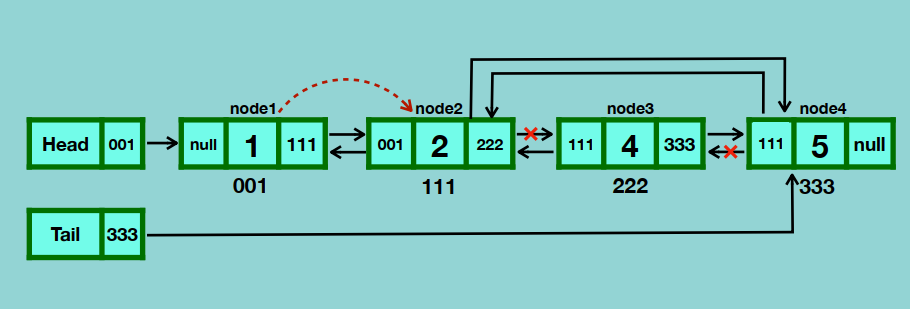

* Store the reference of the **specified indexed node** (i.e., `get(index)`) in `popped_node`.
* Update `popped_node.prev.next` reference to `popped_node.next`.
* Update `popped_node.next.prev` reference to `popped_node.prev`.
* Update `popped_node.next` reference to `None`.
* Update `popped_node.prev` reference to `None`.
* Decrease the doubly linked list length by 1.
* Return popped_node

```
popped_node = get(index)
popped_node.prev.next = popped_node.next
popped_node.next.prev = popped_node.prev
popped_node.next = None
popped_node.prev = None
doubly_linked_list_length = doubly_linked_list_length - 1
return popped_node
```

**Implementation**

```python
# Remove any middle-indexed node of a doubly linked list
    def remove(self, index):
        if index < -1 or index >= self.length:
            print("Invalid Index!!!")
            return None
        # remove specified indexed node in an empty doubly Linked List
        if index == 0:
            return self.pop_first()
        # remove specified indexed node in a doubly Linked List having only one node
        if index == -1 or index == self.length - 1:
            return self.pop()
        # remove specified indexed node in a doubly Linked List having more than one node
        popped_node = self.get(index)  # reference of the specified indexed node
        popped_node.prev.next = popped_node.next
        popped_node.next.prev = popped_node.prev
        popped_node.next = None
        popped_node.prev = None
        self.length -= 1
        return popped_node
```

In [27]:
# Create Doubly Linked List: 10 > 20 > 30 > 40 
doubly_linked_list = DoublyLinkedList()
node = doubly_linked_list.remove(0)
print()
print("Trying to remove node from empty Doubly Linked List: ", node)

doubly_linked_list.append(10)
doubly_linked_list.append(20)
doubly_linked_list.append(30)
doubly_linked_list.append(40)
print()
print("Original Doubly Linked List: ", doubly_linked_list)

node = doubly_linked_list.remove(-1)
print()
print("Remove index -1 element: ", node.data)
print("Doubly Linked List after deletion: ", doubly_linked_list)

node = doubly_linked_list.remove(1)
print()
print("Remove index 1 element: ", node.data)
print("Doubly Linked List after deletion: ", doubly_linked_list)

node = doubly_linked_list.remove(doubly_linked_list.length - 1 )
print()
print("Remove last index element: ", node.data)
print("Doubly Linked List after deletion: ", doubly_linked_list)

node = doubly_linked_list.remove(100 )
print()
print("Trying to remove greater than last index: ", node)

node = doubly_linked_list.remove(-100)
print()
print("Trying to remove less than -1 index: ", node)

Invalid Index!!!

Trying to remove node from empty Doubly Linked List:  None

Original Doubly Linked List:  10 <-> 20 <-> 30 <-> 40

Remove index -1 element:  40
Doubly Linked List after deletion:  10 <-> 20 <-> 30

Remove index 1 element:  20
Doubly Linked List after deletion:  10 <-> 30

Remove last index element:  30
Doubly Linked List after deletion:  10
Invalid Index!!!

Trying to remove greater than last index:  None
Invalid Index!!!

Trying to remove less than -1 index:  None


## Delete all nodes: `delete_all()` method

**Implementation**

```python
# Delete all nodes of a Doubly linked list
def delete_all(self):
    if self.length == 0:
        return  # If the list is empty, just return
    for _ in range(self.length):
        self.pop()        
```

* Since each node of a doubly linked list has two pointers, `prev` & `next`.
* Simply setting `head=None` and `tail=None` will not make the nodes eligible for garbage collection because the node will still have the `prev` pointer of the following node pointing to it.
* Hence, we need to iteratively delete all nodes explicitly.


In [30]:
# Create Doubly Linked List: 10 > 20 > 30 > 40 
doubly_linked_list = DoublyLinkedList()

# Create Doubly Linked List: 10 > 20 > 30 > 40 
doubly_linked_list.append(10)
doubly_linked_list.append(20)
doubly_linked_list.append(30)
doubly_linked_list.append(40)

print("Original Doubly Linked List: ", doubly_linked_list)

doubly_linked_list.delete_all()
print("Doubly Linked list after deletion: ", doubly_linked_list)

Original Doubly Linked List:  10 <-> 20 <-> 30 <-> 40
Doubly Linked list after deletion:  


# Doubly Linked list Deletion Algorithm

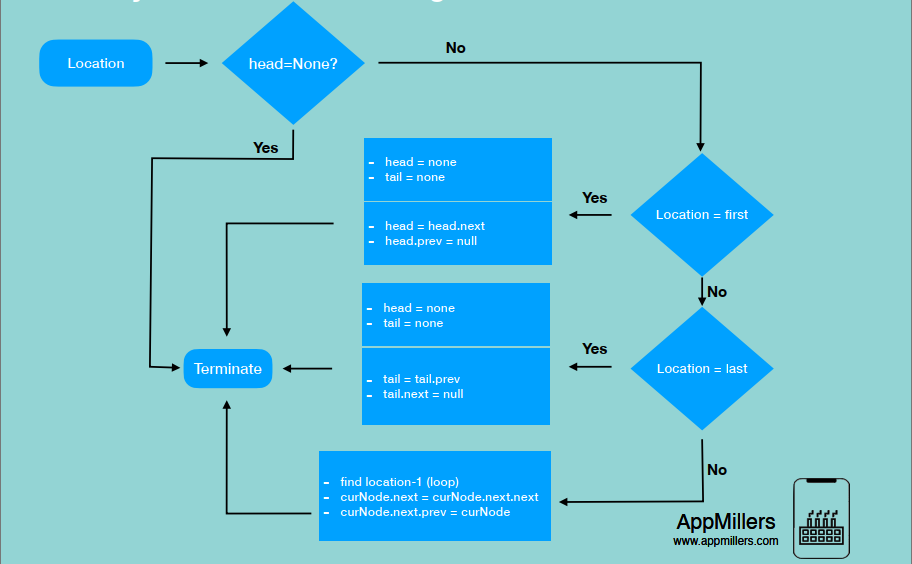